# Start data exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Load files, use lines=true, because of JSONL format (one JSON object per line)

In [3]:
try:
     merchants_df = pd.read_csv('../data/merchants.csv')
     print("\nMerchants data loaded.")
except FileNotFoundError:
     print("Couldn't find merchants.csv file.")

try:
     transactions_df = pd.read_json('../data/transactions.json', lines=True)
     print("\nTransactions data loaded.")
except FileNotFoundError:
     print("Couldn't find transactions.json file.")

try:
     users_df = pd.read_csv('../data/users.csv')
     print("\nUsers data loaded.")
except FileNotFoundError:
     print("Couldn't find users.csv file.")


Merchants data loaded.

Transactions data loaded.

Users data loaded.


In [ ]:
# Basic information about the dataframes
print("\n--- Basic Information ---")

for df_name, df in [('merchants_df', merchants_df if 'merchants_df' in locals() else None),
                    ('transactions_df', transactions_df if 'transactions_df' in locals() else None),
                    ('users_df', users_df if 'users_df' in locals() else None)]:
    if df is not None:
        print(f"\n{df_name.upper()} Shape: {df.shape}")
        print(f"\nFirst 5 rows of {df_name}:")
        display(df.head())
        
        print(f"\nData types in {df_name}:")
        display(df.dtypes)
        print(f"\nSummary statistics for {df_name}:")
        display(df.describe(include='all').T)
        
        # Check for missing values
        missing = df.isnull().sum()
        if missing.sum() > 0:
            print(f"\nMissing values in {df_name}:")
            display(missing[missing > 0])
        else:
            print(f"\nNo missing values in {df_name}")


--- Basic Information ---

MERCHANTS_DF Shape: (1000, 8)

First 5 rows of merchants_df:


,merchant_id,category,country,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,M0001,travel,Austria,1.000000,3,97.23,84,0
1,M0002,clothing,Poland,0.689695,2,142.71,93,1
2,M0003,electronics,Czech Republic,0.834610,5,67.83,65,0
3,M0004,electronics,Belgium,0.607229,1,16.77,9,1
4,M0005,grocery,Ireland,0.641901,2,38.56,100,0



Data types in merchants_df:


merchant_id                        object
category                           object
country                            object
trust_score                       float64
number_of_alerts_last_6_months      int64
avg_transaction_amount            float64
account_age_months                  int64
has_fraud_history                   int64
dtype: object


Summary statistics for merchants_df:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
merchant_id,1000,1000,M0001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1000,7,grocery,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1000,14,Portugal,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trust_score,1000.0,NaN,NaN,NaN,0.682568,0.194092,0.0,0.545615,0.697414,0.825599,1.0
number_of_alerts_last_6_months,1000.0,NaN,NaN,NaN,3.061,1.72286,0.0,2.0,3.0,4.0,9.0
avg_transaction_amount,1000.0,NaN,NaN,NaN,81.88309,79.187529,0.12,24.7725,58.205,117.1925,709.04
account_age_months,1000.0,NaN,NaN,NaN,61.526,33.453617,6.0,32.0,61.0,92.0,119.0
has_fraud_history,1000.0,NaN,NaN,NaN,0.52,0.49985,0.0,0.0,1.0,1.0,1.0



No missing values in merchants_df

TRANSACTIONS_DF Shape: (500000, 14)

First 5 rows of transactions_df:


,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0



Data types in transactions_df:


transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object


Summary statistics for transactions_df:


In [ ]:
fraud_df = transactions_df[transactions_df['is_fraud'] == 1]
print(f"\nFraudulent transactions shape: {fraud_df.shape}")
print(f"\nFraudulent transactions percentage: {len(fraud_df) / len(transactions_df) * 100:.2f}%")

fraud_by_merchant = transactions_df['merchant_id'].value_counts().reset_index()
fraud_by_merchant.columns = ['merchant_id', 'fraud_count']
merchant_stats = fraud_by_merchant.merge(merchants_df, on='merchant_id', how='left')
display(merchant_stats.head())
display(merchant_stats.describe().T)



Fraudulent transactions shape: (42411, 14)

Fraudulent transactions percentage: 8.48%


,merchant_id,fraud_count,category,country,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,M0079,571,travel,Sweden,0.295231,0,1.26,12,1
1,M0167,570,clothing,Austria,0.121984,0,77.46,78,1
2,M0187,569,restaurants,Ireland,0.739880,7,15.85,114,1
3,M0991,563,grocery,France,0.880147,4,80.02,52,1
4,M0377,558,travel,Netherlands,1.000000,3,0.67,31,1


,count,mean,std,min,25%,50%,75%,max
fraud_count,1000.0,500.000000,22.280000,429.00,485.000000,500.000000,514.000000,571.00
trust_score,1000.0,0.682568,0.194092,0.00,0.545615,0.697414,0.825599,1.00
number_of_alerts_last_6_months,1000.0,3.061000,1.722860,0.00,2.000000,3.000000,4.000000,9.00
avg_transaction_amount,1000.0,81.883090,79.187529,0.12,24.772500,58.205000,117.192500,709.04
account_age_months,1000.0,61.526000,33.453617,6.00,32.000000,61.000000,92.000000,119.00
has_fraud_history,1000.0,0.520000,0.499850,0.00,0.000000,1.000000,1.000000,1.00


In [ ]:
extend_trans = transactions_df.copy()
extend_trans['month'] = extend_trans['timestamp'].dt.month
extend_trans['weekday'] = extend_trans['timestamp'].dt.weekday
extend_trans['hour'] = extend_trans['timestamp'].dt.hour
extend_trans['quarter'] = extend_trans['timestamp'].dt.quarter
import reverse_geocoder as rg
import tqdm

def get_country_from_coordinates(lat, long):
    """Convert latitude and longitude to country name"""
    try:
        result = rg.search((lat, long))
        return result[0]['cc']  # Returns country code
    except:
        return "Unknown"

# Apply to your dataset - using regular tqdm instead of notebook version to avoid widget issues
# This is a workaround for the IProgress not found error
countries = []
for i, row in tqdm.tqdm(extend_trans.iterrows(), total=len(extend_trans)):
    lat = row['location']['lat']
    long = row['location']['long']
    country = get_country_from_coordinates(lat, long)
    countries.append(country)
    print(f"Processed {i+1}/{len(extend_trans)}")
    print(f"Country for transaction {i}: {country}")

extend_trans['country'] = countries

print(f"\nExtended transactions shape: {extend_trans.shape}")
print(f"\nExtended transactions head:")
display(extend_trans.head())
print(f"\nExtended transactions summary:")
display(extend_trans.describe().T)

Note: you may need to restart the kernel to use updated packages.


Loading formatted geocoded file...


Traceback (most recent call last):
  File "<string>", line 1, in <module>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mastercard/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
  File "<string>", line 1, in <module>
    exitcode = _main(fd, parent_sentinel)
  File "/opt/anaconda3/envs/mastercard/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
  File "/opt/anaconda3/envs/mastercard/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    self = reduction.pickle.load(from_parent)
  File "/opt/anaconda3/envs/mastercard/lib/python3.10/site-packages/reverse_geocoder/__init__.py", line 19, in <module>
    from scipy.spatial import cKDTree as KDTree
  File "/opt/anaconda3/envs/mastercard/lib/python3.10/site-packages/scipy/spatial/__init__.py", line 123, in <module>
    from . import distance, transform
  File "/opt/anaconda3/envs/mastercard/lib/python3.10/site-packages/scipy/spatial/transform/__init__.py", line 19, in <module>
   

In [ ]:
from funs import chi2_independence

chi2_independence(extend_trans, 'month', 'is_fraud', type="description")

Chi-square statistic:  8.330914982204687
p-value:  0.6833900068676846
Degrees of freedom:  11
Expected frequencies: 
month               1             2            3             4            5   \
is_fraud                                                                       
0         38731.248138  35118.125394  39247.40853  37752.922856  38899.64089   
1          3589.751862   3254.874606   3637.59147   3499.077144   3605.35911   

month               6             7            8             9             10  \
is_fraud                                                                        
0         37791.360332  38950.890858  38789.81953  37483.860524  38356.940336   
1          3502.639668   3610.109142   3595.18047   3474.139476   3555.059664   

month               11            12  
is_fraud                              
0         37447.253404  39019.529208  
1          3470.746596   3616.470792  


In [ ]:
chi2_independence(extend_trans, 'quarter', 'is_fraud', type="description")

Chi-square statistic:  0.768873773573426
p-value:  0.8568965972587906
Degrees of freedom:  3
Expected frequencies: 
quarter               1              2              3              4
is_fraud                                                            
0         113096.782062  114443.924078  115224.570912  114823.722948
1          10482.217938   10607.075922   10679.429088   10642.277052


In [ ]:
chi2_independence(extend_trans, 'weekday', 'is_fraud', type="description")

Chi-square statistic:  3.994218141876562
p-value:  0.6774589050444695
Degrees of freedom:  6
Expected frequencies: 
weekday              0            1             2             3            4  \
is_fraud                                                                       
0         65089.289716  65334.55742  65513.932308  64962.079974  65092.03525   
1          6032.710284   6055.44258   6072.067692   6020.920026   6032.96475   

weekday              5             6  
is_fraud                              
0         65625.584024  65971.521308  
1          6082.415976   6114.478692  


In [ ]:
chi2_independence(extend_trans, 'hour', 'is_fraud', type="description")

Chi-square statistic:  15.527870097144085
p-value:  0.8747230024433464
Degrees of freedom:  23
Expected frequencies: 
hour                0             1             2             3   \
is_fraud                                                           
0         19029.296154  18867.309648  19118.983598  18924.050684   
1          1763.703846   1748.690352   1772.016402   1753.949316   

hour                4             5             6             7   \
is_fraud                                                           
0         19042.108646  19257.175476  19065.903274  19215.992466   
1          1764.891354   1784.824524   1767.096726   1781.007534   

hour                8             9   ...            14            15  \
is_fraud                              ...                               
0         18871.885538  19062.242562  ...  19002.755992  19002.755992   
1          1749.114462   1766.757438  ...   1761.244008   1761.244008   

hour               16           17         

In [ ]:
chi2_independence(extend_trans, 'country', 'is_fraud', type="description")


amount - Spearman correlation test:
Correlation coefficient: 0.0021
p-value: 0.1412
Statistically significant: No


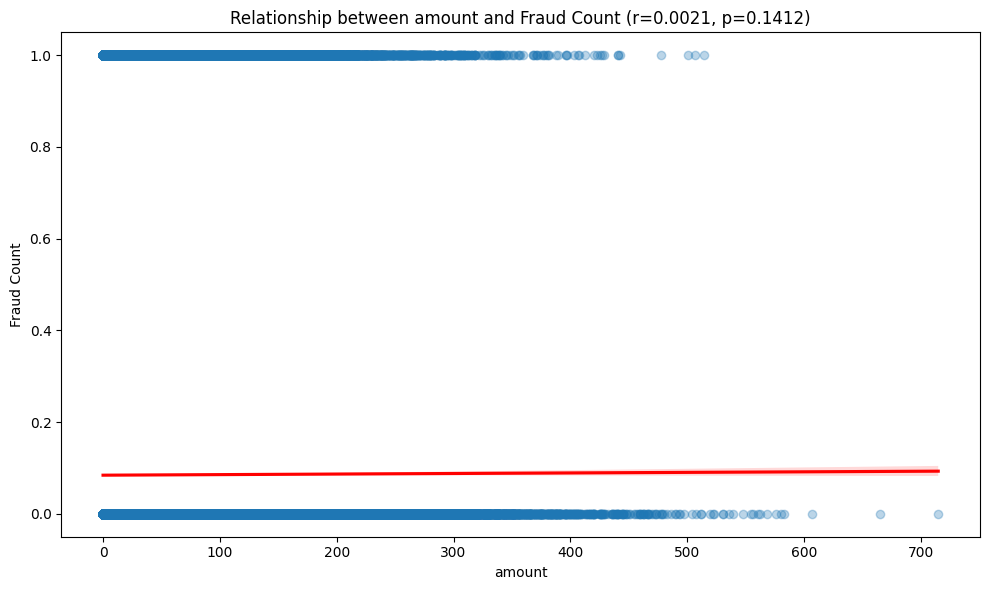

In [ ]:
import scipy.stats as stats

def test_numerical_variable(df, column, target='fraud_count'):
     # Remove NaN values
     df_valid = df.dropna(subset=[column])
     
     # Calculate Spearman rank correlation (doesn't require normal distribution)
     corr, p_value = stats.spearmanr(df_valid[column], df_valid[target])
     
     print(f"\n{column} - Spearman correlation test:")
     print(f"Correlation coefficient: {corr:.4f}")
     print(f"p-value: {p_value:.4f}")
     print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")
     
     # Create scatter plot with trend line
     plt.figure(figsize=(10, 6))
     ax = sns.regplot(x=column, y=target, data=df_valid, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
     ax.set_title(f'Relationship between {column} and Fraud Count (r={corr:.4f}, p={p_value:.4f})')
     ax.set_xlabel(column)
     ax.set_ylabel('Fraud Count')
     plt.tight_layout()
     plt.show()

test_numerical_variable(extend_trans, 'amount', target='is_fraud')

In [9]:
positive = transactions_df.copy()
positive = positive[positive['is_fraud'] == 1]
users_with_fraud = users_df.copy()
users_with_fraud['fraud_count'] = 0
for i in range(len(positive)):
    users_with_fraud.loc[users_with_fraud['user_id'] == positive.iloc[i]['user_id'], 'fraud_count'] += 1
users_with_fraud = users_with_fraud[users_with_fraud['fraud_count'] > 0]
users_with_fraud['time_from_signing_up'] = users_with_fraud['signup_date'].apply(lambda x: (pd.to_datetime('now') - pd.to_datetime(x)).days)
users_with_fraud.sort_values(by='fraud_count', ascending=False, inplace=True)
display(users_with_fraud.head(30))
print(f"\nUsers with fraud shape: {users_with_fraud.shape}")
print(f"\nUsers with fraud summary:")
display(users_with_fraud.describe().T)
display(users_df.describe().T)

,user_id,age,sex,education,primary_source_of_income,sum_of_monthly_installments,sum_of_monthly_expenses,country,signup_date,risk_score,fraud_count,time_from_signing_up
1948,U01949,22,Female,High School,Savings,11.74,2455.65,Poland,2022-09-07,0.125323,11,976
263,U00264,41,Male,Master,Savings,426.13,1222.48,Finland,2022-12-21,0.299698,10,871
9201,U09202,61,Female,PhD,Savings,65.83,574.76,Czech Republic,2021-11-28,0.279310,9,1259
2577,U02578,23,Female,NaN,Retirement,491.99,1416.98,Finland,2021-03-07,0.196204,9,1525
18180,U18181,32,Other,PhD,Business,0.52,2720.95,Portugal,2020-06-13,0.373086,9,1792
12219,U12220,56,Female,Bachelor,Unemployment,216.53,188.40,Czech Republic,2024-08-29,0.542549,9,254
10043,U10044,20,Female,Master,Retirement,452.60,298.03,Austria,2024-12-22,0.492586,9,139
12300,U12301,24,Male,High School,Retirement,194.62,73.69,Denmark,2024-09-05,0.342786,9,247
14140,U14141,32,Male,High School,Unemployment,65.69,175.76,France,2020-05-05,0.374425,9,1831
1360,U01361,68,Male,Master,Savings,216.77,2332.51,Italy,2020-08-30,0.174371,8,1714



Users with fraud shape: (17570, 12)

Users with fraud summary:


,count,mean,std,min,25%,50%,75%,max
age,17570.0,46.001764,16.520710,18.00,32.000000,46.000000,60.000000,74.00
sum_of_monthly_installments,17570.0,301.530915,305.004011,0.01,87.432500,206.925000,417.455000,3165.70
sum_of_monthly_expenses,17570.0,1184.997870,1173.496644,0.04,354.492500,825.865000,1654.962500,10994.33
risk_score,17570.0,0.497842,0.149533,0.00,0.395909,0.496478,0.599653,1.00
fraud_count,17570.0,2.413830,1.330262,1.00,1.000000,2.000000,3.000000,11.00
time_from_signing_up,17570.0,944.789414,519.454396,49.00,493.000000,945.000000,1399.000000,1845.00


,count,mean,std,min,25%,50%,75%,max
age,20000.0,45.973300,16.520649,18.00,32.00000,46.000000,60.000000,74.00
sum_of_monthly_installments,20000.0,301.669748,304.160334,0.01,87.76750,207.650000,418.272500,3165.70
sum_of_monthly_expenses,20000.0,1184.221874,1172.054772,0.04,353.65500,824.885000,1651.987500,10994.33
risk_score,20000.0,0.501277,0.149876,0.00,0.39848,0.500119,0.603234,1.00


Statistical significance tests for categorical variables:

sex - ANOVA test:
F-statistic: 1.0481
p-value: 0.3506
Statistically significant: No


<Figure size 1400x1000 with 0 Axes>

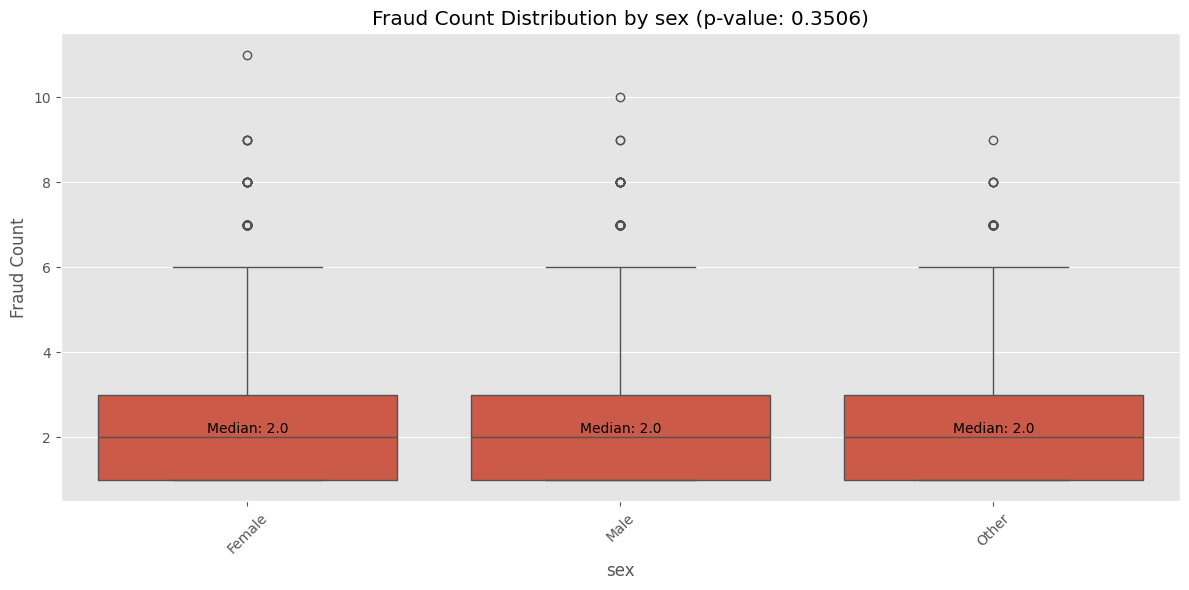


education - ANOVA test:
F-statistic: 0.5666
p-value: 0.6370
Statistically significant: No


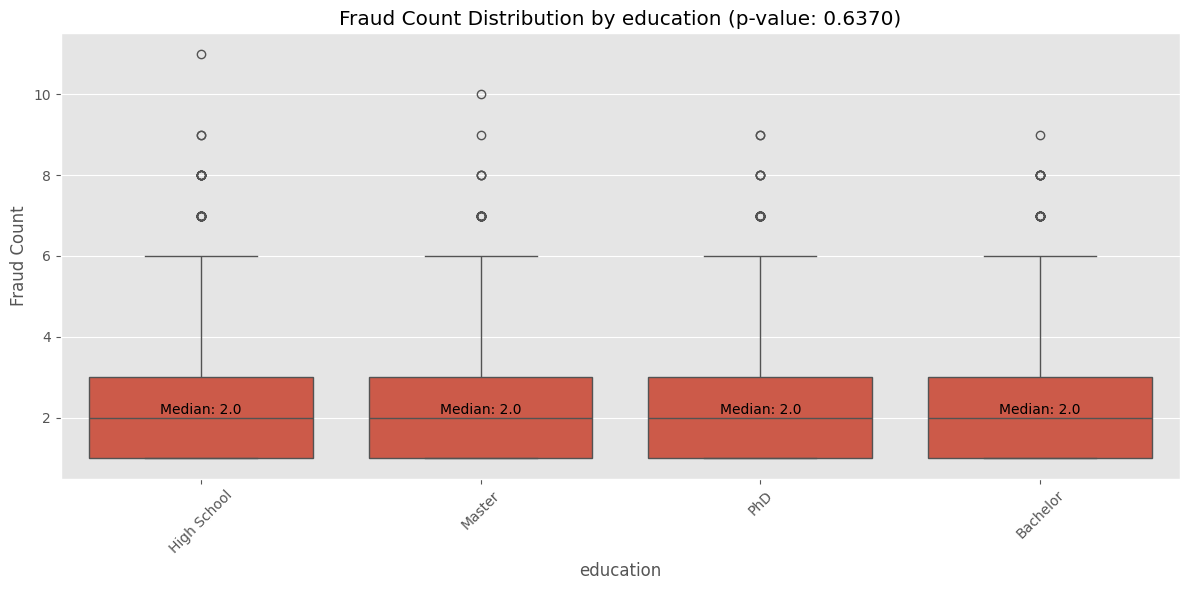


primary_source_of_income - ANOVA test:
F-statistic: 0.4413
p-value: 0.8199
Statistically significant: No


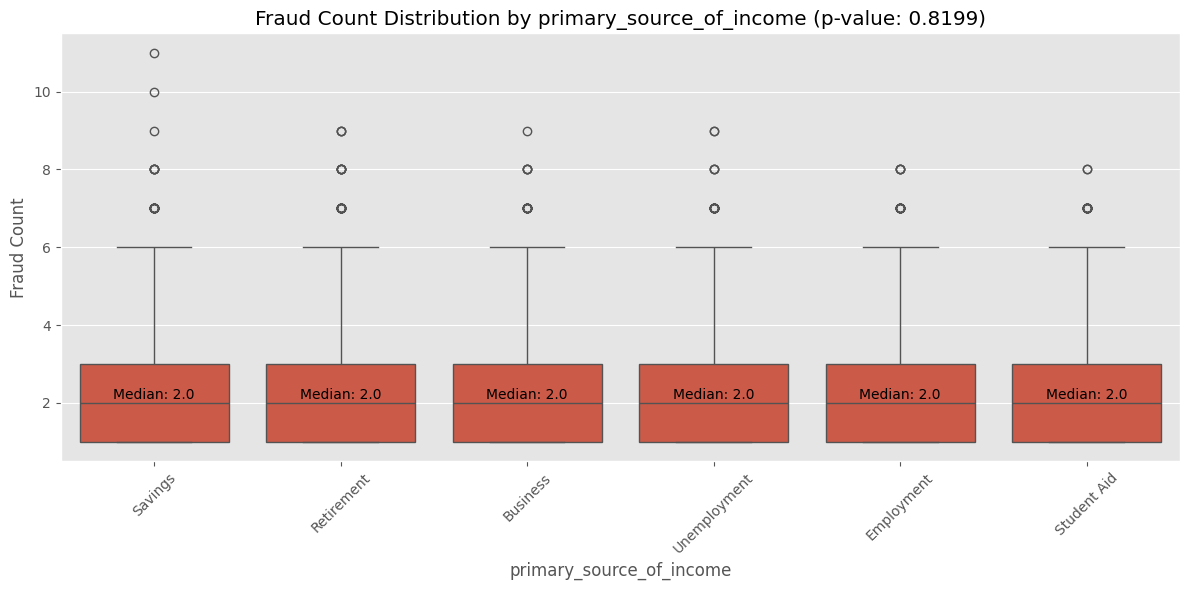


country - ANOVA test:
F-statistic: 0.7336
p-value: 0.7312
Statistically significant: No


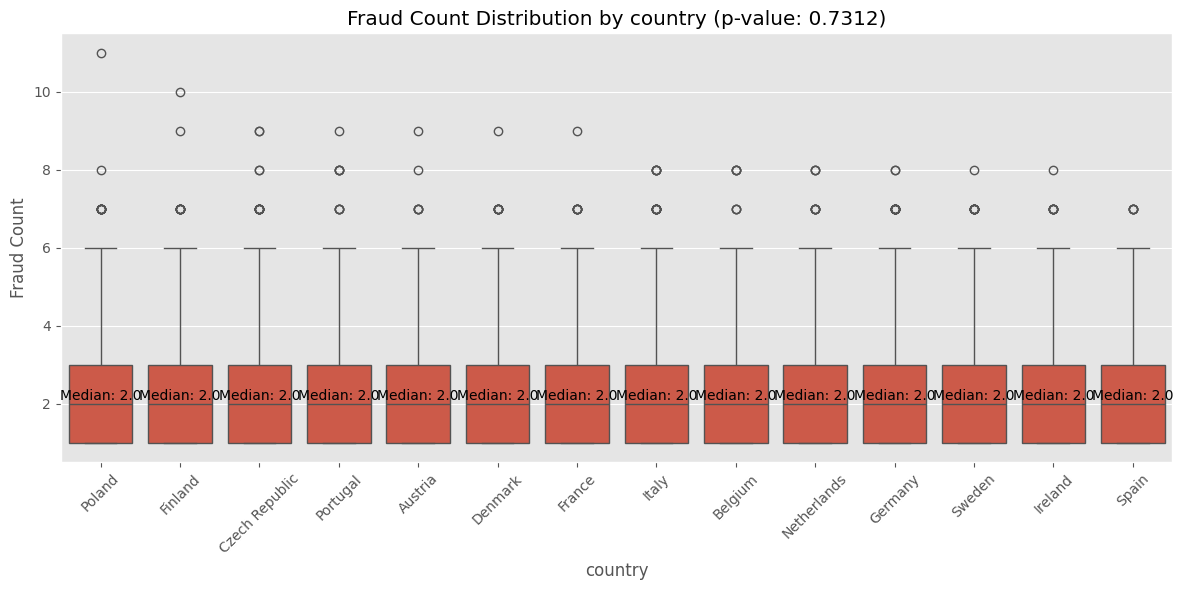


Statistical significance tests for numerical variables:

age - Spearman correlation test:
Correlation coefficient: 0.0020
p-value: 0.7943
Statistically significant: No


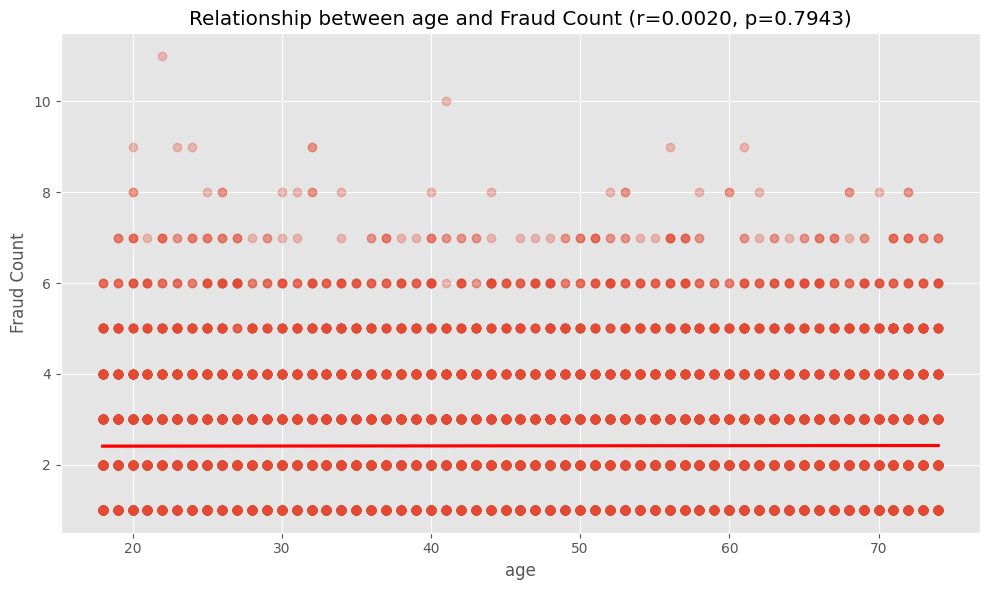


sum_of_monthly_installments - Spearman correlation test:
Correlation coefficient: -0.0028
p-value: 0.7101
Statistically significant: No


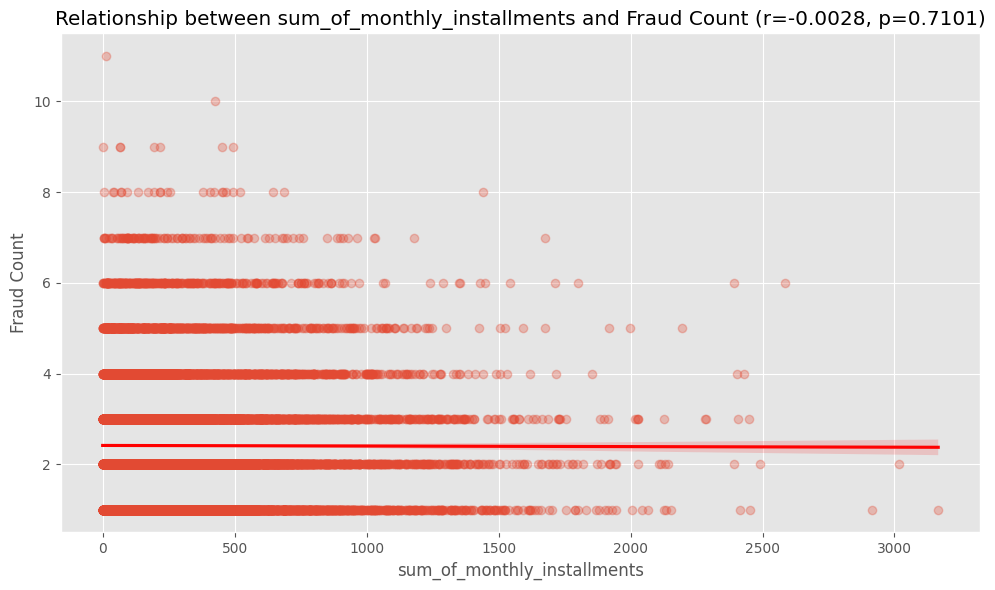


sum_of_monthly_expenses - Spearman correlation test:
Correlation coefficient: -0.0041
p-value: 0.5855
Statistically significant: No


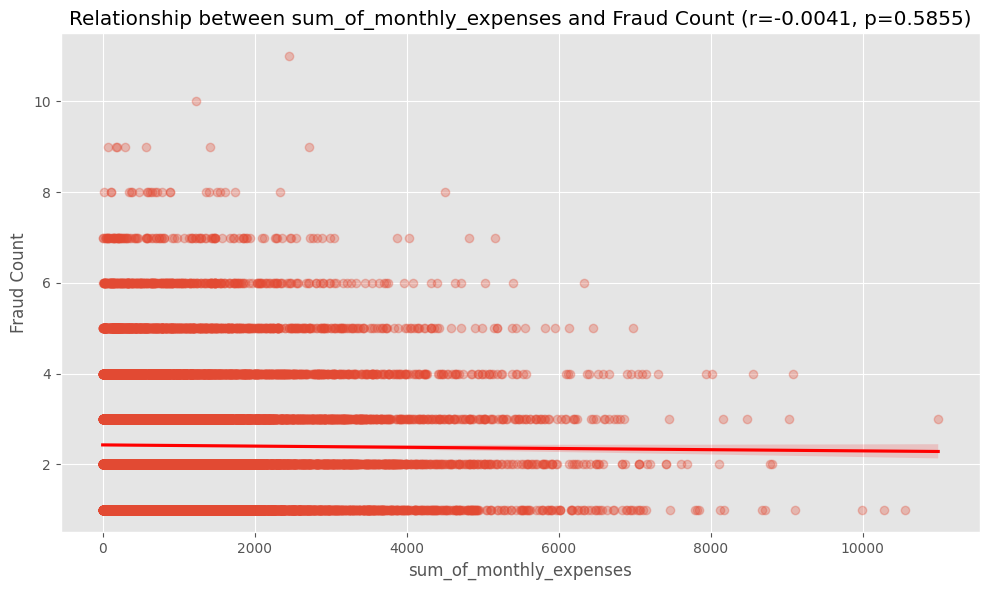


risk_score - Spearman correlation test:
Correlation coefficient: -0.0978
p-value: 0.0000
Statistically significant: Yes


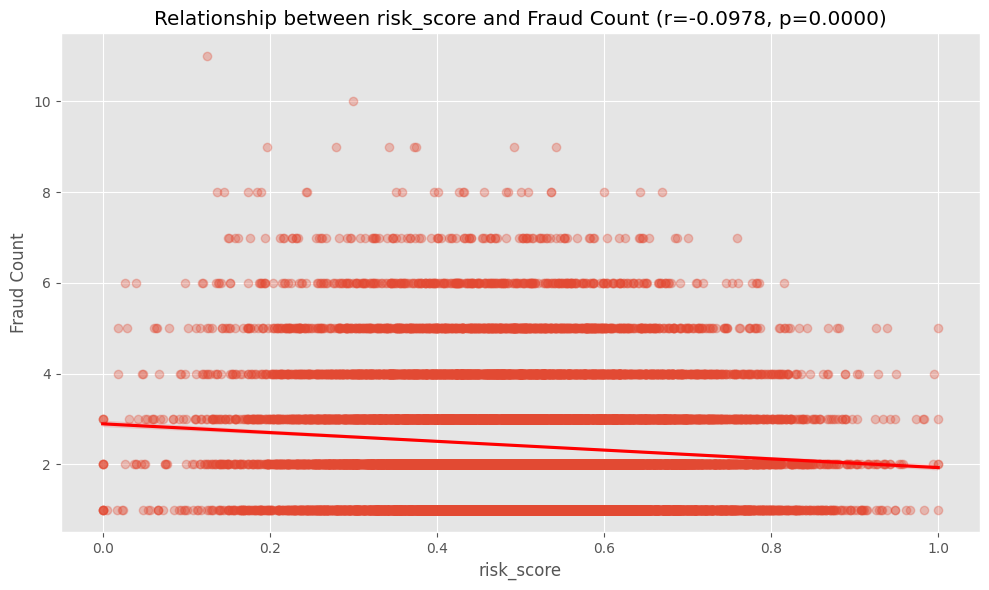


time_from_signing_up - Spearman correlation test:
Correlation coefficient: -0.0062
p-value: 0.4126
Statistically significant: No


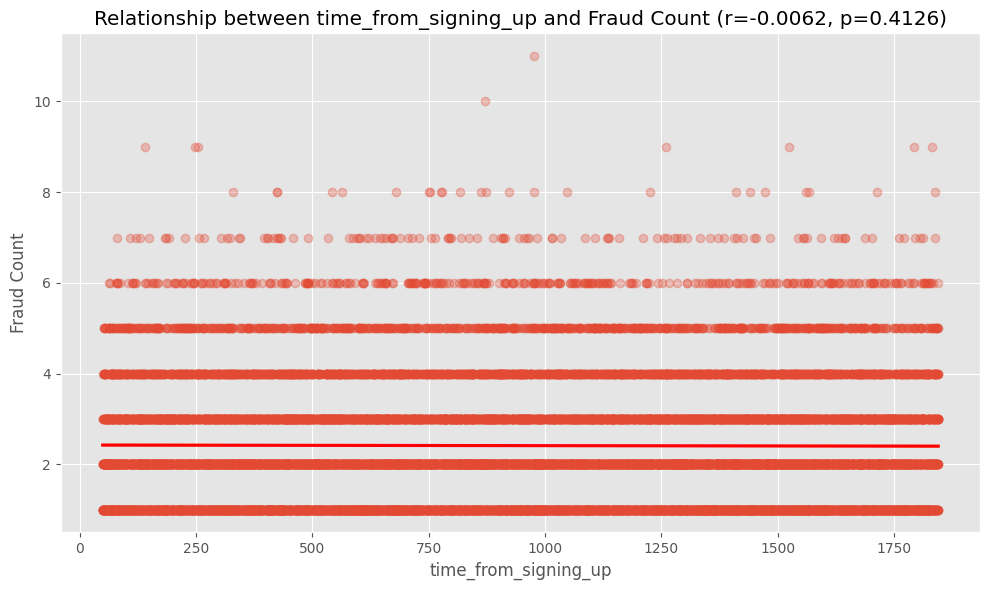


Chi-Square tests for association between categorical variables and fraud tendency:

sex vs High Fraud Tendency - Chi-square test:
Chi-square: 2.3896
p-value: 0.3028
Degrees of freedom: 2
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

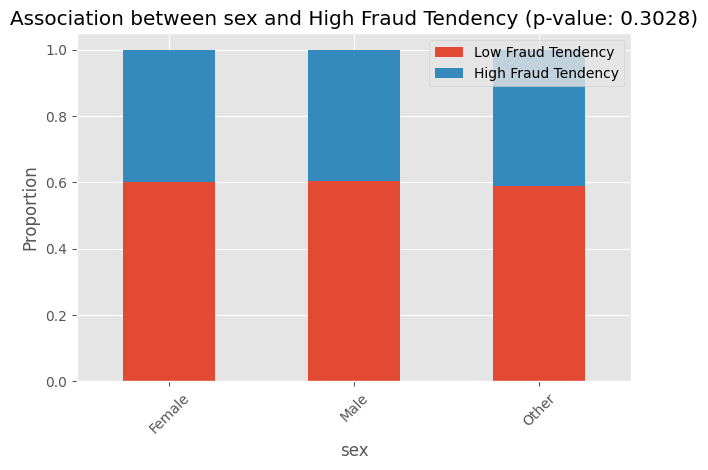


education vs High Fraud Tendency - Chi-square test:
Chi-square: 0.6263
p-value: 0.8904
Degrees of freedom: 3
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

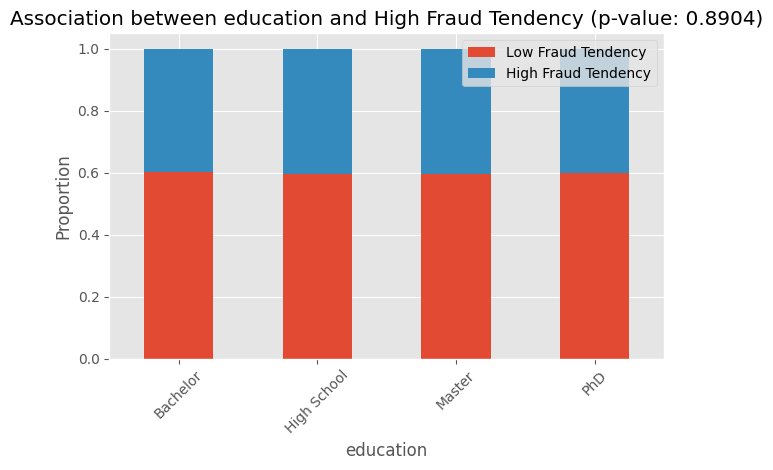


primary_source_of_income vs High Fraud Tendency - Chi-square test:
Chi-square: 1.3242
p-value: 0.9324
Degrees of freedom: 5
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

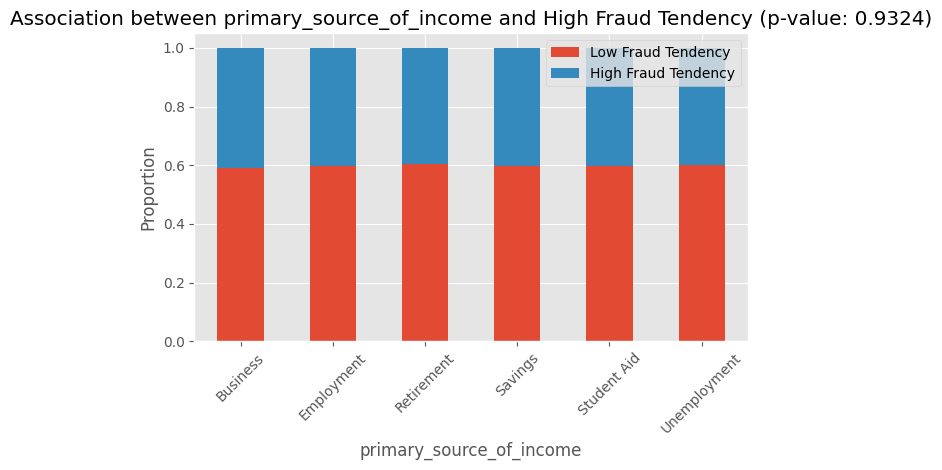


country vs High Fraud Tendency - Chi-square test:
Chi-square: 12.9822
p-value: 0.4492
Degrees of freedom: 13
Statistically significant: No


<Figure size 1200x600 with 0 Axes>

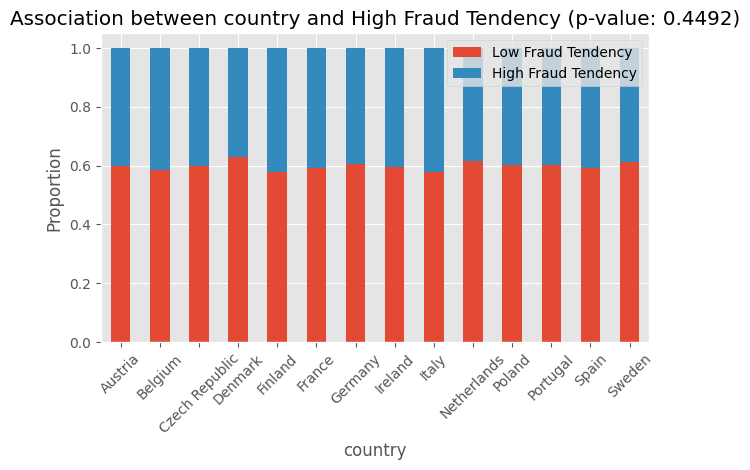


T-tests for binary variables:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform statistical tests to check the significance of different variables
# in users_with_fraud on the number of fraud incidents per user

import scipy.stats as stats
import matplotlib.pyplot as plt

# Set the style for plots
plt.style.use('ggplot')
plt.figure(figsize=(14, 10))

# 1. ANOVA test for categorical variables
print("Statistical significance tests for categorical variables:")

# Function to perform ANOVA and create boxplot
def test_categorical_variable(df, column, target='fraud_count'):
     # Remove NaN values
     df_valid = df.dropna(subset=[column])
     
     # Group data by the categorical variable
     groups = [group[target].values for name, group in df_valid.groupby(column)]
     
     # Perform ANOVA test
     f_stat, p_value = stats.f_oneway(*groups)
     
     print(f"\n{column} - ANOVA test:")
     print(f"F-statistic: {f_stat:.4f}")
     print(f"p-value: {p_value:.4f}")
     print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")
     
     # Create boxplot
     plt.figure(figsize=(12, 6))
     ax = sns.boxplot(x=column, y=target, data=df_valid)
     ax.set_title(f'Fraud Count Distribution by {column} (p-value: {p_value:.4f})')
     ax.set_xlabel(column)
     ax.set_ylabel('Fraud Count')
     
     # Add median values
     medians = df_valid.groupby(column)[target].median().values
     for i, median in enumerate(medians):
          ax.text(i, median + 0.1, f'Median: {median:.1f}', ha='center')
     
     plt.xticks(rotation=45)
     plt.tight_layout()
     plt.show()
     
     # If significant, perform post-hoc Tukey test
     if p_value < 0.05 and len(groups) > 2:
          tukey = pairwise_tukeyhsd(df_valid[target], df_valid[column], alpha=0.05)
          print("\nTukey HSD post-hoc test:")
          print(tukey)

# Test categorical variables
categorical_vars = ['sex', 'education', 'primary_source_of_income', 'country']
for var in categorical_vars:
     test_categorical_variable(users_with_fraud, var)

# 2. Correlation test for numerical variables
print("\nStatistical significance tests for numerical variables:")

# Function to test correlation with fraud_count
def test_numerical_variable(df, column, target='fraud_count'):
     # Remove NaN values
     df_valid = df.dropna(subset=[column])
     
     # Calculate Spearman rank correlation (doesn't require normal distribution)
     corr, p_value = stats.spearmanr(df_valid[column], df_valid[target])
     
     print(f"\n{column} - Spearman correlation test:")
     print(f"Correlation coefficient: {corr:.4f}")
     print(f"p-value: {p_value:.4f}")
     print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")
     
     # Create scatter plot with trend line
     plt.figure(figsize=(10, 6))
     ax = sns.regplot(x=column, y=target, data=df_valid, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
     ax.set_title(f'Relationship between {column} and Fraud Count (r={corr:.4f}, p={p_value:.4f})')
     ax.set_xlabel(column)
     ax.set_ylabel('Fraud Count')
     plt.tight_layout()
     plt.show()

# Test numerical variables
numerical_vars = ['age', 'sum_of_monthly_installments', 'sum_of_monthly_expenses', 'risk_score', 'time_from_signing_up']
for var in numerical_vars:
     test_numerical_variable(users_with_fraud, var)

# 3. Chi-Square test for association between categorical variables
print("\nChi-Square tests for association between categorical variables and fraud tendency:")

def chi2_test_with_fraud_tendency(df, column):
     # Create a binary variable for fraud tendency (high vs low)
     df = df.copy()
     median_fraud = df['fraud_count'].median()
     df['high_fraud'] = (df['fraud_count'] > median_fraud).astype(int)
     
     # Create contingency table
     contingency = pd.crosstab(df[column], df['high_fraud'])
     
     # Chi-square test
     chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
     
     print(f"\n{column} vs High Fraud Tendency - Chi-square test:")
     print(f"Chi-square: {chi2:.4f}")
     print(f"p-value: {p_value:.4f}")
     print(f"Degrees of freedom: {dof}")
     print(f"Statistically significant: {'Yes' if p_value < 0.05 else 'No'}")
     
     # Create a stacked bar chart
     plt.figure(figsize=(12, 6))
     pd.crosstab(df[column], df['high_fraud'], normalize='index').plot(kind='bar', stacked=True)
     plt.title(f'Association between {column} and High Fraud Tendency (p-value: {p_value:.4f})')
     plt.xlabel(column)
     plt.ylabel('Proportion')
     plt.legend(['Low Fraud Tendency', 'High Fraud Tendency'])
     plt.xticks(rotation=45)
     plt.tight_layout()
     plt.show()

# Test categorical variables with chi-square
for var in categorical_vars:
     chi2_test_with_fraud_tendency(users_with_fraud.dropna(subset=[var]), var)

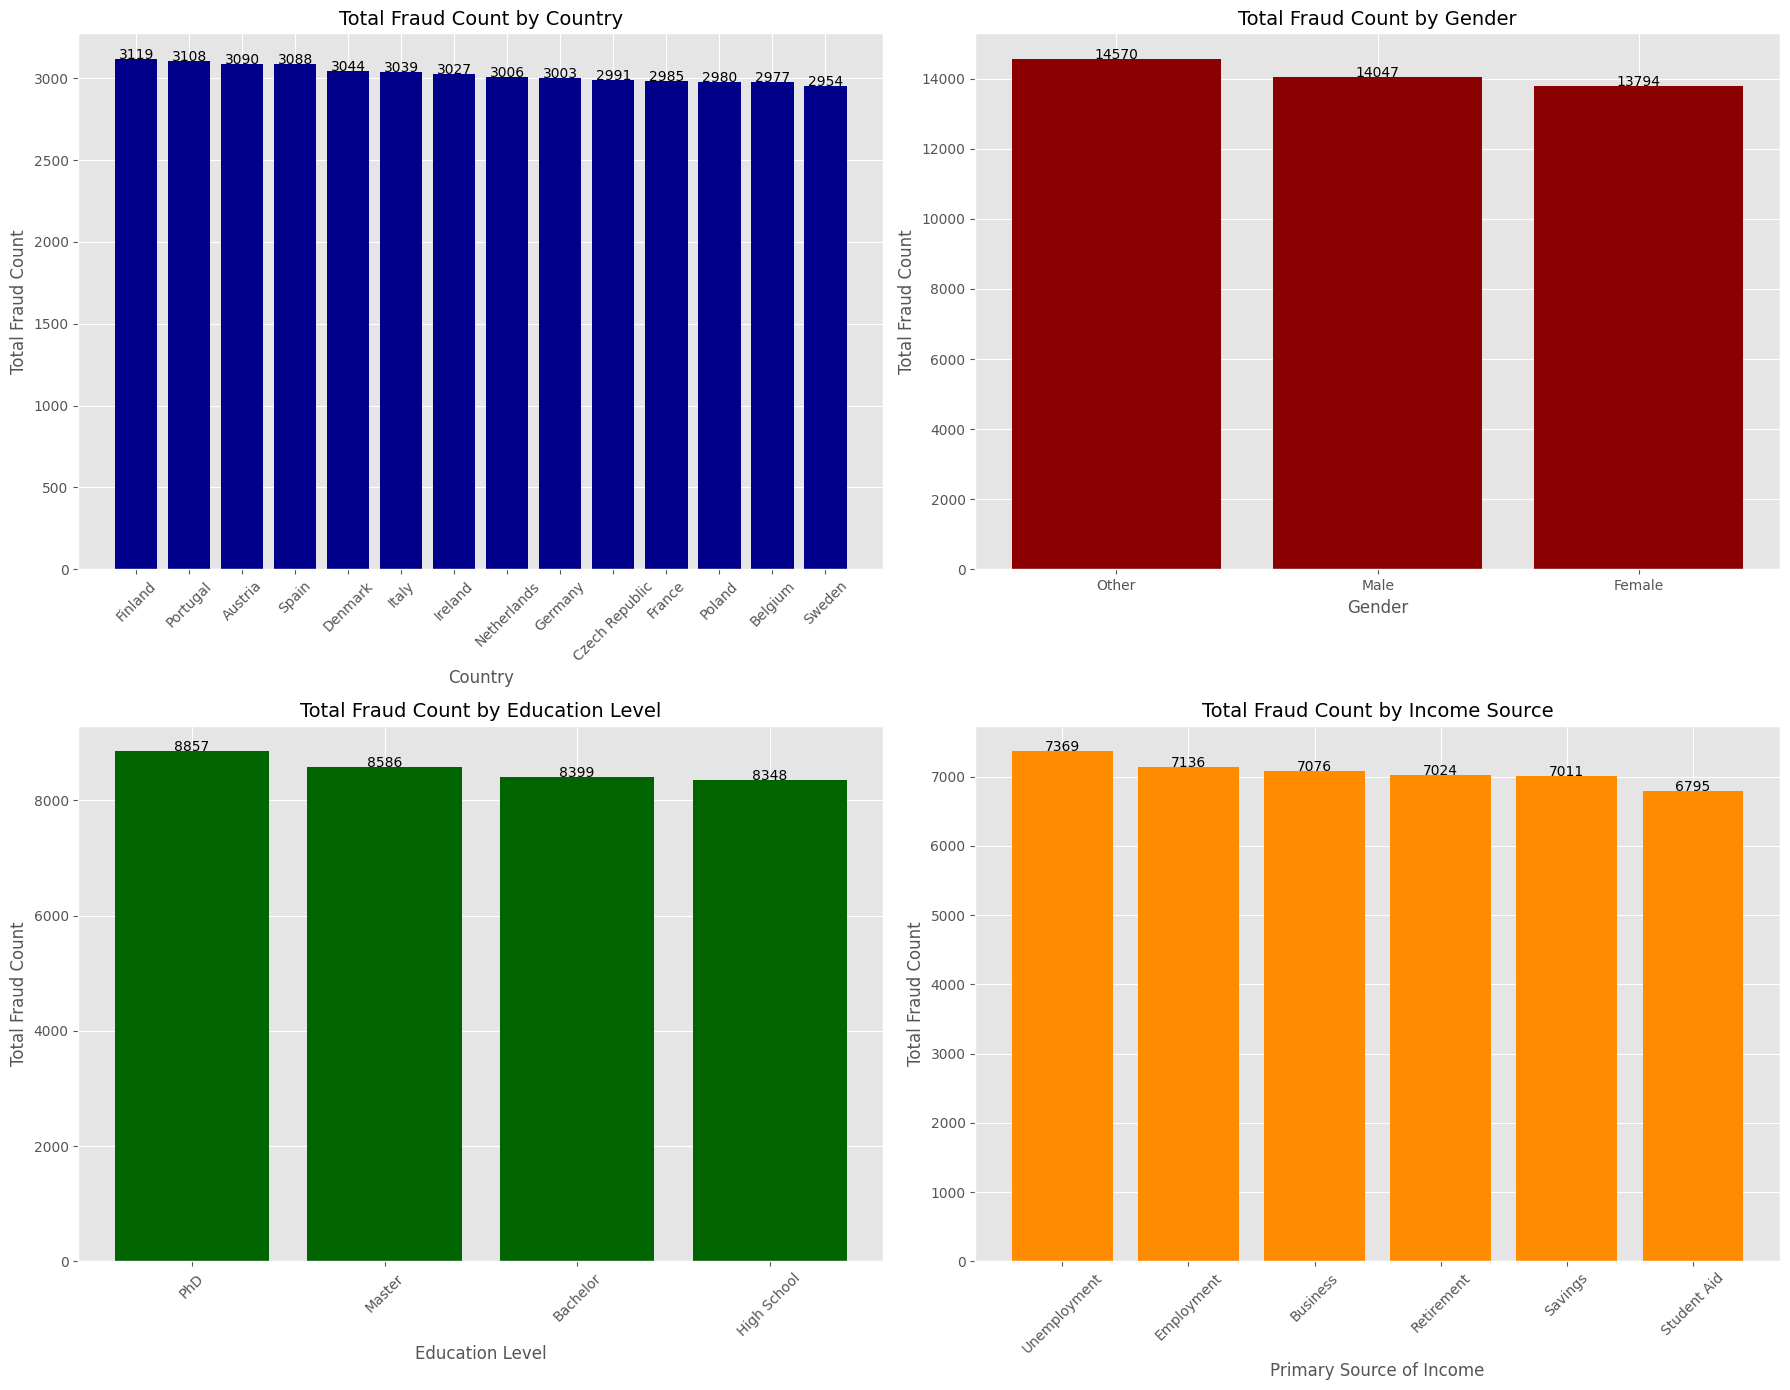

/var/folders/df/3_ym9w5d05gbbkc5t4gh1kn80000gn/T/ipykernel_95667/1950626838.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_fraud = users_with_fraud.groupby('age_group')['fraud_count'].sum().sort_values(ascending=False)


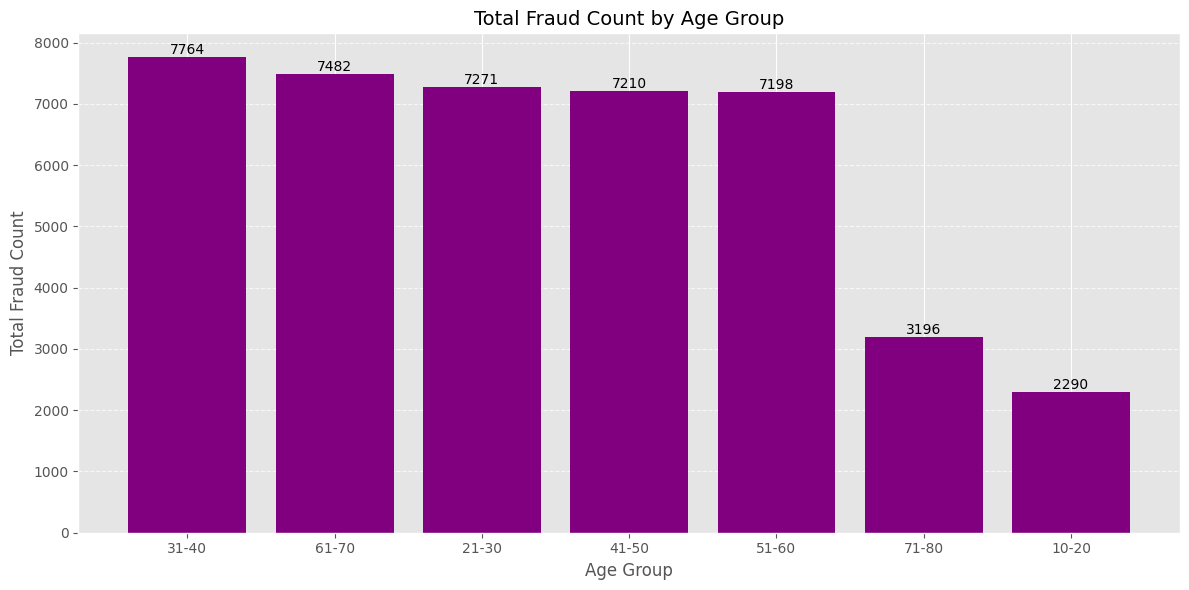

In [12]:
# Create visualizations for fraud counts by categorical variables in users_with_fraud

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 1. Fraud count by country
country_fraud = users_with_fraud.groupby('country')['fraud_count'].sum().sort_values(ascending=False)
axes[0, 0].bar(country_fraud.index, country_fraud.values, color='darkblue')
axes[0, 0].set_title('Total Fraud Count by Country', fontsize=14)
axes[0, 0].set_xlabel('Country', fontsize=12)
axes[0, 0].set_ylabel('Total Fraud Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(country_fraud.values):
     axes[0, 0].text(i, v + 0.5, str(int(v)), ha='center')

# 2. Fraud count by gender
gender_fraud = users_with_fraud.groupby('sex')['fraud_count'].sum().sort_values(ascending=False)
axes[0, 1].bar(gender_fraud.index, gender_fraud.values, color='darkred')
axes[0, 1].set_title('Total Fraud Count by Gender', fontsize=14)
axes[0, 1].set_xlabel('Gender', fontsize=12)
axes[0, 1].set_ylabel('Total Fraud Count', fontsize=12)
for i, v in enumerate(gender_fraud.values):
     axes[0, 1].text(i, v + 0.5, str(int(v)), ha='center')

# 3. Fraud count by education level
# Drop NaN values for education
education_fraud = users_with_fraud.dropna(subset=['education']).groupby('education')['fraud_count'].sum().sort_values(ascending=False)
axes[1, 0].bar(education_fraud.index, education_fraud.values, color='darkgreen')
axes[1, 0].set_title('Total Fraud Count by Education Level', fontsize=14)
axes[1, 0].set_xlabel('Education Level', fontsize=12)
axes[1, 0].set_ylabel('Total Fraud Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(education_fraud.values):
     axes[1, 0].text(i, v + 0.5, str(int(v)), ha='center')

# 4. Fraud count by primary source of income
income_fraud = users_with_fraud.groupby('primary_source_of_income')['fraud_count'].sum().sort_values(ascending=False)
axes[1, 1].bar(income_fraud.index, income_fraud.values, color='darkorange')
axes[1, 1].set_title('Total Fraud Count by Income Source', fontsize=14)
axes[1, 1].set_xlabel('Primary Source of Income', fontsize=12)
axes[1, 1].set_ylabel('Total Fraud Count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(income_fraud.values):
     axes[1, 1].text(i, v + 0.5, str(int(v)), ha='center')

plt.tight_layout()
plt.show()

# Additional visualization: Age distribution of fraudulent users
plt.figure(figsize=(12, 6))
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
users_with_fraud['age_group'] = pd.cut(users_with_fraud['age'], bins=age_bins, labels=age_labels)
age_group_fraud = users_with_fraud.groupby('age_group')['fraud_count'].sum().sort_values(ascending=False)

bars = plt.bar(age_group_fraud.index, age_group_fraud.values, color='purple')
plt.title('Total Fraud Count by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Fraud Count', fontsize=12)
for bar in bars:
     height = bar.get_height()
     plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/df/3_ym9w5d05gbbkc5t4gh1kn80000gn/T/ipykernel_95667/1541789949.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_trust = merchants_df.groupby('trust_score_bin')['has_fraud_history'].mean() * 100


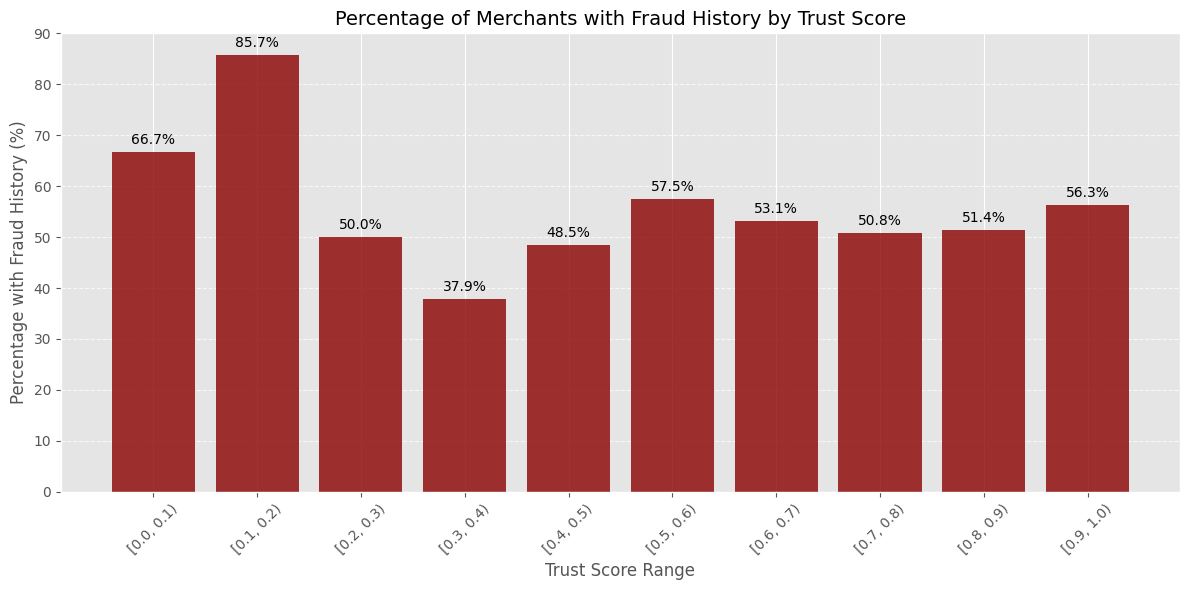

In [4]:
trust_score_bins = np.arange(0, 1.1, 0.1)
merchants_df['trust_score_bin'] = pd.cut(merchants_df['trust_score'], bins=trust_score_bins, right=False)

fraud_by_trust = merchants_df.groupby('trust_score_bin')['has_fraud_history'].mean() * 100

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_by_trust.index.astype(str), fraud_by_trust.values, color='darkred', alpha=0.8)

# Add labels and title
plt.xlabel('Trust Score Range', fontsize=12)
plt.ylabel('Percentage with Fraud History (%)', fontsize=12)
plt.title('Percentage of Merchants with Fraud History by Trust Score', fontsize=14)
plt.xticks(rotation=45)

# Add values on top of bars
for bar in bars:
     height = bar.get_height()
     plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
transactions_with_country = pd.read_csv('../data/transactions_with_countries.csv')
transactions_with_country['trans_country'] = transactions_with_country['country'].astype('category')
transactions_with_country = transactions_with_country.merge(merchants_df, on='merchant_id', how='left')
transactions_with_country = transactions_with_country.merge(users_df, on='user_id', how='left')

In [8]:
# Display all columns in transactions_with_country DataFrame
print(transactions_with_country.columns)

Index(['transaction_id', 'timestamp', 'user_id', 'merchant_id', 'amount',
       'channel', 'currency', 'device', 'payment_method', 'is_international',
       'session_length_seconds', 'is_first_time_merchant', 'is_fraud',
       'country_x', 'trans_country', 'category', 'country_y', 'trust_score',
       'number_of_alerts_last_6_months', 'avg_transaction_amount',
       'account_age_months', 'has_fraud_history', 'age', 'sex', 'education',
       'primary_source_of_income', 'sum_of_monthly_installments',
       'sum_of_monthly_expenses', 'country', 'signup_date', 'risk_score'],
      dtype='object')


In [19]:
transactions_with_country.drop(columns=['age', 'country_x', 'session_length_seconds', 'currency', 'education', 'channel', 'sex', 'number_of_alerts_last_6_months', 'device', 'payment_method', 'has_fraud_history', 'primary_source_of_income'], inplace=True)
display(transactions_with_country.head())

,transaction_id,timestamp,user_id,merchant_id,amount,is_international,is_first_time_merchant,is_fraud,trans_country,category,country_y,trust_score,avg_transaction_amount,account_age_months,sum_of_monthly_installments,sum_of_monthly_expenses,country,signup_date,risk_score
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,1,0,0,Italy,travel,France,0.581711,74.97,23,336.26,93.70,Sweden,2022-08-10,0.426675
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,1,1,0,Spain,electronics,Germany,0.568933,56.92,23,513.43,2047.83,France,2024-05-22,0.729627
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,1,1,0,Poland,gaming,Denmark,0.608070,98.93,75,388.36,89.83,Italy,2021-05-18,0.393848
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,0,1,0,Ireland,electronics,Portugal,0.592656,21.60,82,79.46,159.47,Portugal,2021-09-05,0.393405
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,1,0,0,United Kingdom,gaming,Spain,0.450223,60.61,82,444.06,4268.46,Austria,2023-06-01,0.524168


In [20]:
transactions_with_country['merchant_country'] = transactions_with_country['country_y']
transactions_with_country['user_country'] = transactions_with_country['country']
transactions_with_country.sort_values(by='timestamp', ascending=True, inplace=True)
transactions_with_country.drop(columns=['country_y', 'country'], inplace=True)

In [25]:
transactions_with_country.head(50)

,transaction_id,timestamp,user_id,merchant_id,amount,is_international,is_first_time_merchant,is_fraud,trans_country,category,trust_score,avg_transaction_amount,account_age_months,sum_of_monthly_installments,sum_of_monthly_expenses,signup_date,risk_score,merchant_country,user_country
497783,TX497783,2022-01-01 00:06:00,U04367,M0197,41.78,1,0,0,Russian Federation,electronics,0.867635,85.26,79,427.75,997.08,2022-02-02,0.696529,Germany,Netherlands
87684,TX087684,2022-01-01 00:12:00,U07964,M0056,77.36,1,0,0,Norway,travel,0.756445,24.93,69,125.40,402.97,2023-11-01,0.397698,Belgium,Finland
466651,TX466651,2022-01-01 00:12:00,U02226,M0496,160.69,1,1,0,Algeria,clothing,0.887738,94.39,79,53.30,805.98,2020-06-27,0.619942,Sweden,Denmark
5076,TX005076,2022-01-01 00:13:00,U04685,M0484,45.19,1,1,0,Russian Federation,travel,0.596116,23.05,31,554.37,615.45,2020-08-16,0.330483,Spain,Netherlands
429480,TX429480,2022-01-01 00:14:00,U13341,M0960,10.76,1,1,0,Italy,education,0.857549,82.35,82,109.87,496.50,2022-08-20,0.393215,Portugal,Poland
474667,TX474667,2022-01-01 00:27:00,U15598,M0078,139.15,1,0,0,Faroe Islands,restaurants,0.698321,124.72,7,153.84,360.39,2025-02-19,0.537591,Portugal,Denmark
309461,TX309461,2022-01-01 00:28:00,U14876,M0283,4.32,1,1,0,Russian Federation,gaming,0.705130,147.10,38,169.95,2558.99,2025-02-04,0.591157,Poland,Germany
404390,TX404390,2022-01-01 00:31:00,U18382,M0489,16.60,0,0,0,Russian Federation,restaurants,1.000000,21.21,53,75.62,2048.88,2022-06-10,0.591743,Ireland,Ireland
108104,TX108104,2022-01-01 00:32:00,U02015,M0602,40.28,1,1,0,Svalbard and Jan Mayen,travel,0.639330,4.29,91,28.95,474.66,2022-01-14,0.245260,Finland,Czech Republic
463961,TX463961,2022-01-01 00:36:00,U07414,M0958,12.34,1,1,0,United Kingdom,electronics,0.579177,30.62,79,162.94,1100.17,2020-08-07,0.640199,Germany,Netherlands


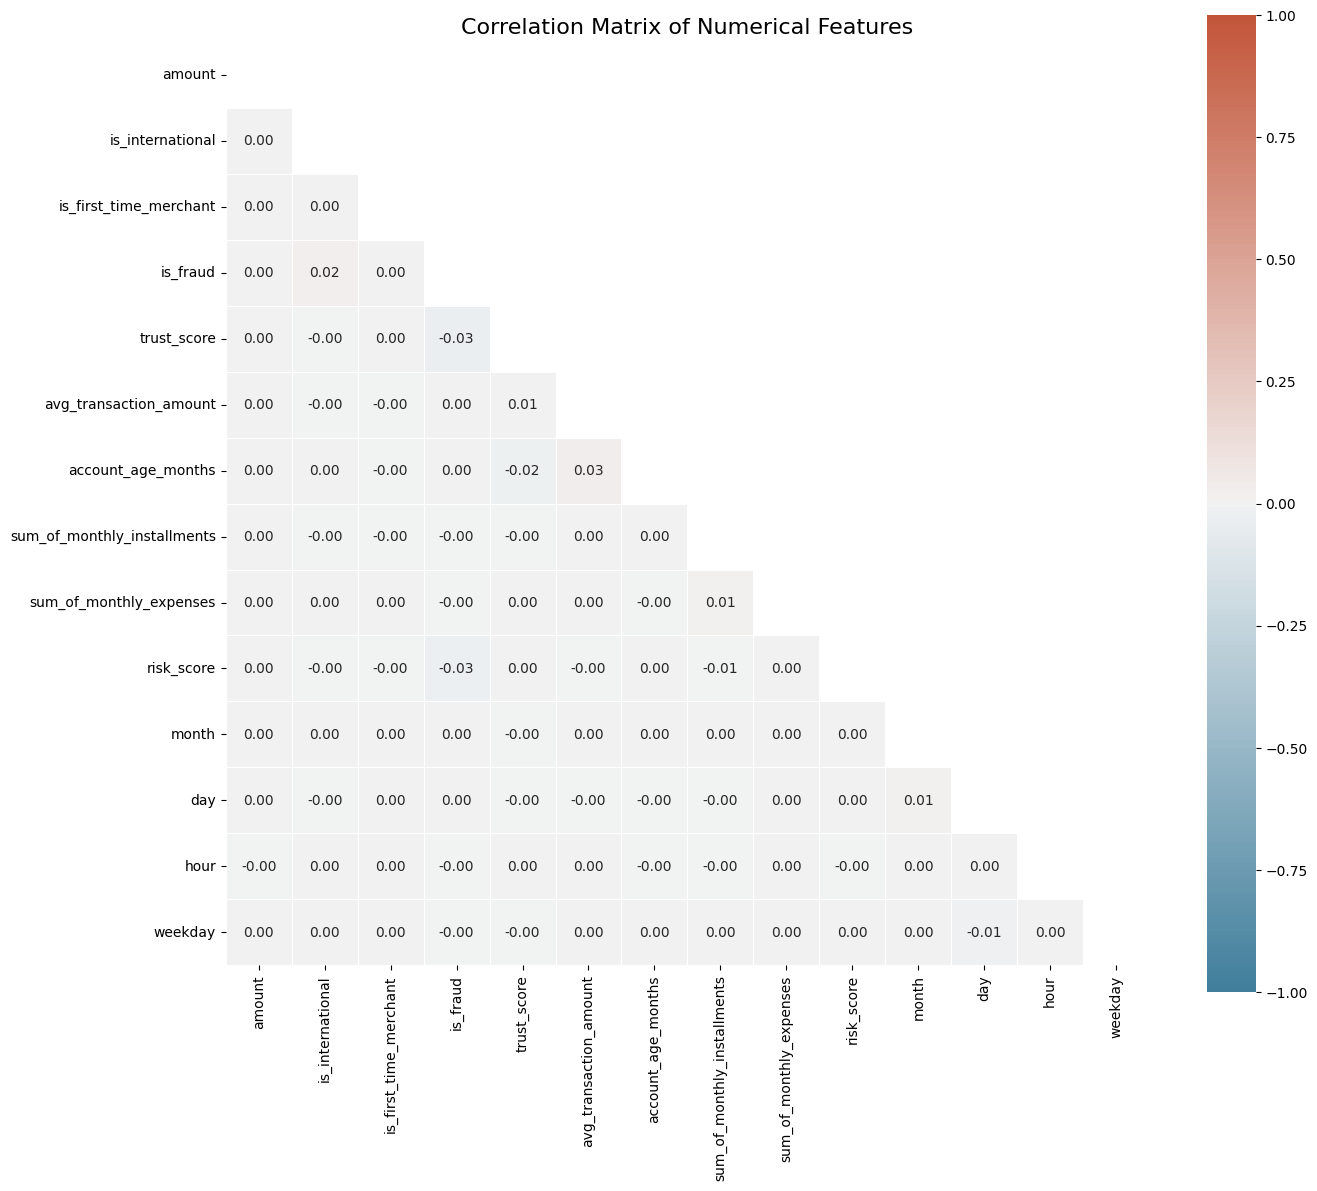


Correlations with is_fraud:
is_fraud                       1.000000
is_international               0.019202
amount                         0.002197
account_age_months             0.002104
avg_transaction_amount         0.001112
day                            0.000858
month                          0.000318
is_first_time_merchant         0.000051
sum_of_monthly_installments   -0.000318
hour                          -0.000884
sum_of_monthly_expenses       -0.001265
weekday                       -0.002374
risk_score                    -0.025765
trust_score                   -0.034161
Name: is_fraud, dtype: float64


In [26]:
# Create correlation matrix for numerical variables in transactions_with_country
# First convert timestamp to datetime if it's not already
transactions_with_country['timestamp'] = pd.to_datetime(transactions_with_country['timestamp'])

# Extract numerical features from timestamp
transactions_with_country['month'] = transactions_with_country['timestamp'].dt.month
transactions_with_country['day'] = transactions_with_country['timestamp'].dt.day
transactions_with_country['hour'] = transactions_with_country['timestamp'].dt.hour
transactions_with_country['weekday'] = transactions_with_country['timestamp'].dt.weekday

# Select numerical columns for correlation
numerical_cols = ['amount', 'is_international', 'is_first_time_merchant', 'is_fraud', 
                     'trust_score', 'avg_transaction_amount', 'account_age_months', 
                     'sum_of_monthly_installments', 'sum_of_monthly_expenses', 'risk_score',
                     'month', 'day', 'hour', 'weekday']

# Create correlation matrix
corr_matrix = transactions_with_country[numerical_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, 
               square=True, linewidths=.5, annot=True, fmt='.2f',
               vmin=-1, vmax=1)

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Find correlations with is_fraud
fraud_corr = corr_matrix['is_fraud'].sort_values(ascending=False)
print("\nCorrelations with is_fraud:")
print(fraud_corr)

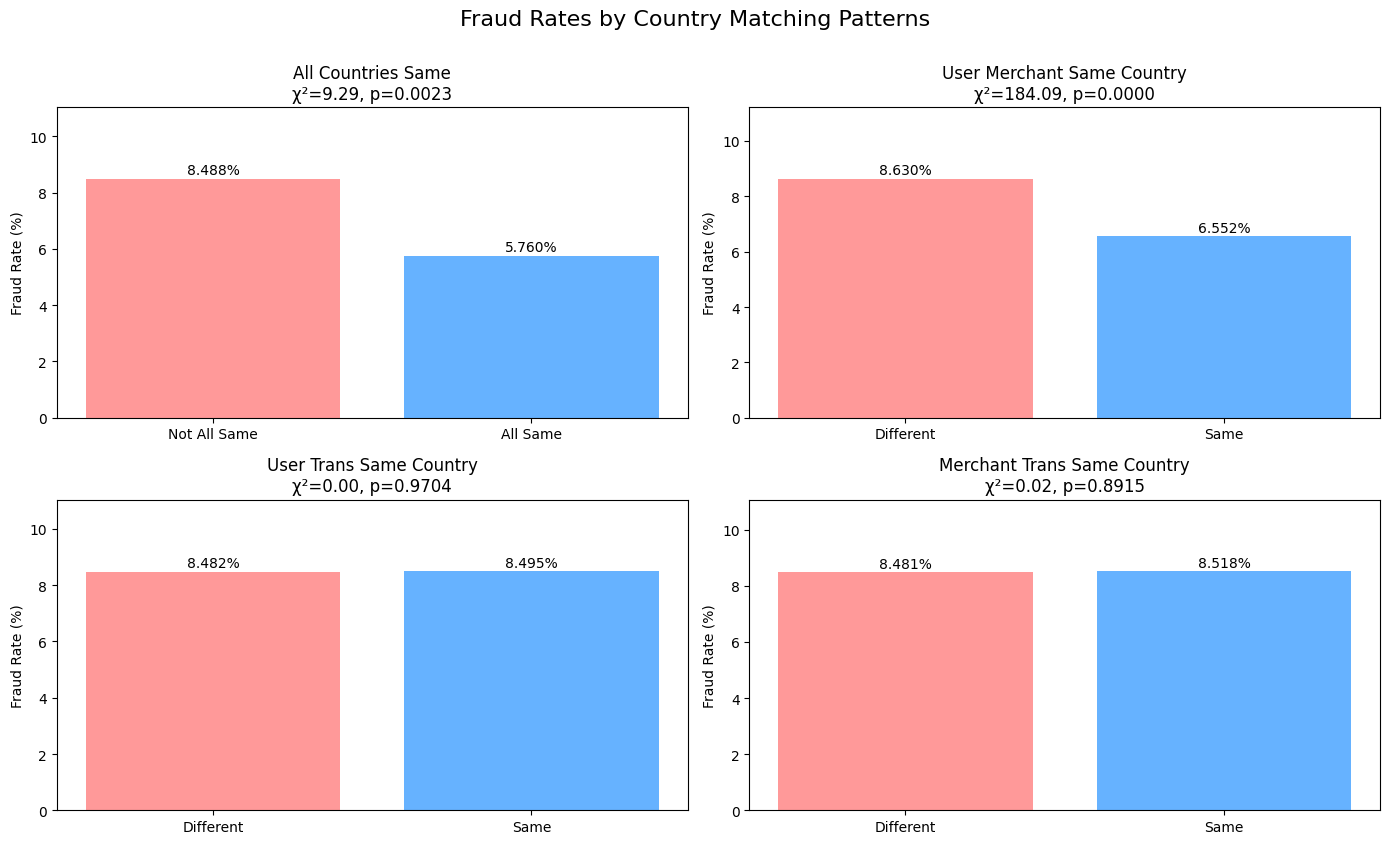

/var/folders/df/3_ym9w5d05gbbkc5t4gh1kn80000gn/T/ipykernel_78923/2707887548.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_fraud.index, y='fraud_rate', data=category_fraud, palette='viridis')


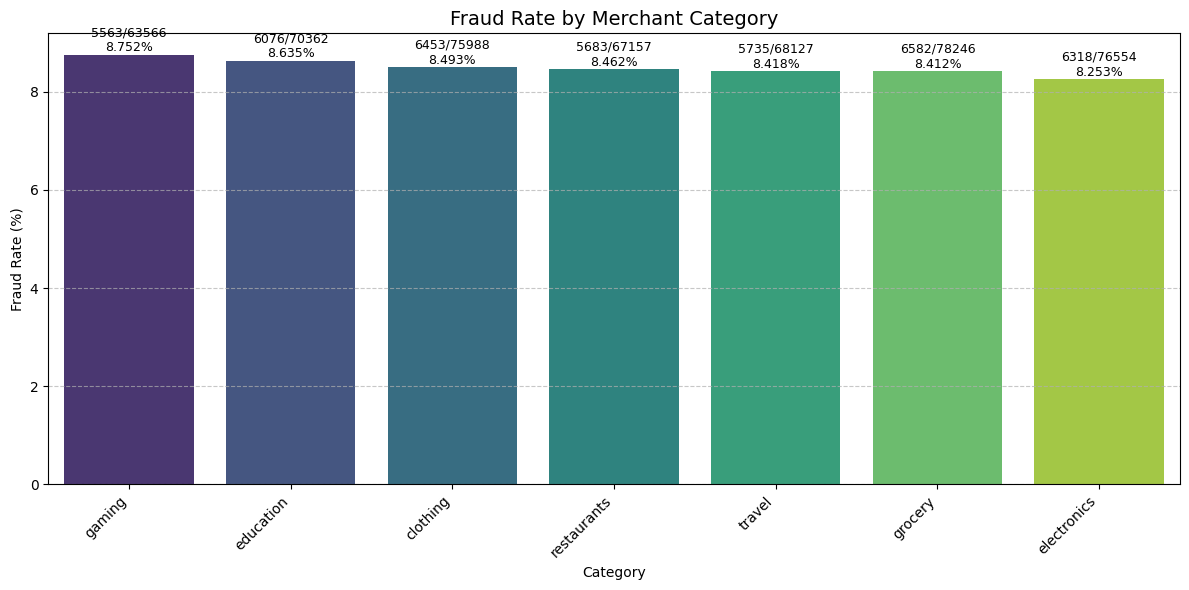


Fraud Rate by EU Status:
           mean   count  fraud_rate
is_eu                              
0      0.084822  500000      8.4822


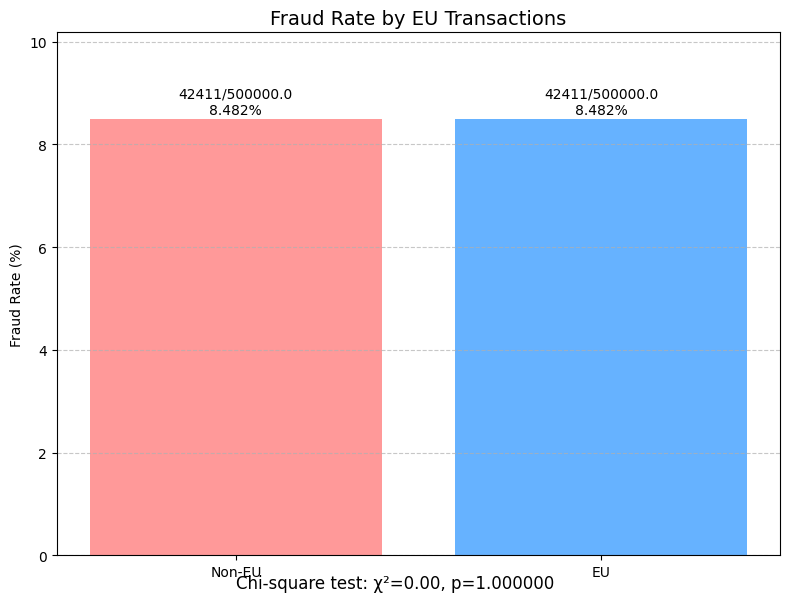

In [30]:
from scipy import stats
# Analyze how country combinations (transaction country, merchant country, user country) affect fraud rates
# Create a new feature for transactions where all three countries match or don't match

# First let's create a new feature for country matching patterns
transactions_with_country['all_countries_same'] = (
     (transactions_with_country['trans_country'] == transactions_with_country['merchant_country']) & 
     (transactions_with_country['trans_country'] == transactions_with_country['user_country'])
).astype(int)

transactions_with_country['user_merchant_same_country'] = (
     transactions_with_country['user_country'] == transactions_with_country['merchant_country']
).astype(int)

transactions_with_country['user_trans_same_country'] = (
     transactions_with_country['user_country'] == transactions_with_country['trans_country']
).astype(int)

transactions_with_country['merchant_trans_same_country'] = (
     transactions_with_country['merchant_country'] == transactions_with_country['trans_country']
).astype(int)

transactions_with_country['is_eu'] = transactions_with_country['trans_country'].apply(
     lambda x: 1 if x in ['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR',
                         'DE', 'GR', 'HU', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 
                         'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE'] else 0
).astype(int)

# Create contingency tables and perform chi-square tests for each pattern
country_patterns = [
     'all_countries_same', 
     'user_merchant_same_country', 
     'user_trans_same_country', 
     'merchant_trans_same_country'
]

# Plot fraud rates for different country matching patterns
plt.figure(figsize=(14, 8))

for i, pattern in enumerate(country_patterns):
     # Create contingency table
     cont_table = pd.crosstab(
          transactions_with_country[pattern], 
          transactions_with_country['is_fraud']
     )
     
     # Calculate fraud rates
     fraud_rates = cont_table[1] / (cont_table[0] + cont_table[1]) * 100
     
     # Chi-square test
     chi2, p, _, _ = stats.chi2_contingency(cont_table)
     
     # Plot
     plt.subplot(2, 2, i+1)
     
     labels = ['Different', 'Same'] if pattern != 'all_countries_same' else ['Not All Same', 'All Same']
     colors = ['#FF9999', '#66B2FF']
     
     ax = plt.bar(labels, fraud_rates, color=colors)
     plt.title(f'{pattern.replace("_", " ").title()}\nχ²={chi2:.2f}, p={p:.4f}')
     plt.ylabel('Fraud Rate (%)')
     plt.ylim(0, max(fraud_rates) * 1.3)
     
     # Add value labels
     for bar in ax:
          height = bar.get_height()
          plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'{height:.3f}%', ha='center', va='bottom')

plt.tight_layout()
plt.suptitle('Fraud Rates by Country Matching Patterns', fontsize=16, y=1.05)
plt.show()

# Let's also analyze merchant categories with highest fraud rates
category_fraud = transactions_with_country.groupby('category')['is_fraud'].agg(['mean', 'count'])
category_fraud['fraud_rate'] = category_fraud['mean'] * 100
category_fraud = category_fraud.sort_values('fraud_rate', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=category_fraud.index, y='fraud_rate', data=category_fraud, palette='viridis')
plt.title('Fraud Rate by Merchant Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count annotations
for i, row in enumerate(category_fraud.itertuples()):
     total_count = row.count
     fraud_count = int(row.mean * total_count)
     plt.text(i, row.fraud_rate + 0.01, 
                f'{fraud_count}/{total_count}\n{row.fraud_rate:.3f}%', 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Analyze the impact of EU transactions on fraud rates
eu_fraud = transactions_with_country.groupby('is_eu')['is_fraud'].agg(['mean', 'count'])
eu_fraud['fraud_rate'] = eu_fraud['mean'] * 100
print("\nFraud Rate by EU Status:")
print(eu_fraud)

# Plot fraud rates by EU status
plt.figure(figsize=(8, 6))
bars = plt.bar(['Non-EU', 'EU'], eu_fraud['fraud_rate'], color=['#FF9999', '#66B2FF'])

plt.title('Fraud Rate by EU Transactions', fontsize=14)
plt.ylabel('Fraud Rate (%)')
plt.ylim(0, max(eu_fraud['fraud_rate']) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for counts and percentages
for i, bar in enumerate(bars):
     height = bar.get_height()
     # Since we only have 1 row in eu_fraud, always use index 0
     count = eu_fraud.iloc[0]['count']
     fraud_count = int(eu_fraud.iloc[0]['mean'] * count)
     plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{fraud_count}/{count}\n{height:.3f}%',
                ha='center', va='bottom', fontsize=10)

# Perform chi-square test
eu_contingency = pd.crosstab(transactions_with_country['is_eu'], transactions_with_country['is_fraud'])
chi2, p, _, _ = stats.chi2_contingency(eu_contingency)
plt.figtext(0.5, 0.01, f'Chi-square test: χ²={chi2:.2f}, p={p:.6f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
transactions_with_country['is_international_real'] =